In [2]:
%mavenRepo clojars https://clojars.org/repo/
%maven origami:origami:4.1.1-8

In [3]:
import org.scijava.nativelib.NativeLoader;
import org.opencv.core.*;
import org.opencv.imgcodecs.Imgcodecs;
import org.opencv.imgproc.Imgproc;
import java.io.IOException;
import origami.Origami;
Origami.init();

Loaded:opencv_java411


In [6]:
public Mat sepia(Mat source) throws IOException {
        // mat is in BGR
        Mat kernel = new Mat(3, 3, CvType.CV_32F);
        kernel.put(0, 0, new double[] {
                // bgr -> blue
                0.272, 0.534, 0.131,
                // bgr -> green
                0.349, 0.686, 0.168,
                // bgr -> red
                0.393, 0.769, 0.189 });

        Mat destination = new Mat();
        Core.transform(source, destination, kernel);
        return destination;
}

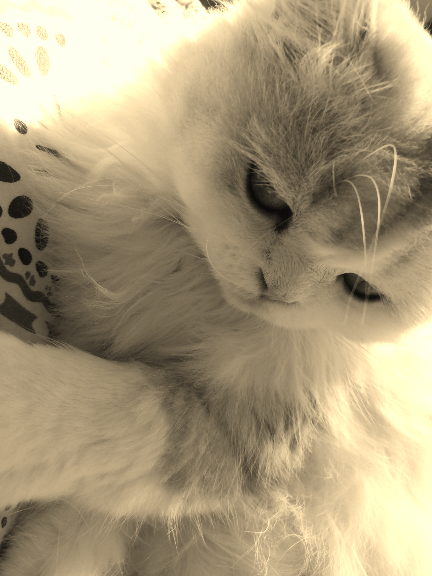

In [7]:
String url = "https://raw.githubusercontent.com/hellonico/opencv4_java_tutorial/master/data/marcel2019.jpg";
Mat marcel = Origami.urlToMat(url);
Mat smallMarcel = new Mat();
int resizeFactor = 4;
Imgproc.resize(marcel, smallMarcel, new Size(marcel.width()/resizeFactor, marcel.height()/resizeFactor));
Origami.matToBufferedImage(sepia(smallMarcel));